In [33]:
import pandas as pd
import plotly.express as px


In [34]:

covid_data = pd.read_csv('COVID-19 in Alabama.csv')  




In [35]:
column_headings = covid_data.columns
print("Column Headings:")
print(column_headings)

Column Headings:
Index(['Counties', 'Cases', 'Total Tested By County', 'Deaths'], dtype='object')


In [36]:
covid_data['Deaths'] = pd.to_numeric(covid_data['Deaths'], errors='coerce')   
covid_data['Cases'] = pd.to_numeric(covid_data['Cases'], errors='coerce')


covid_data['death_rate'] = (covid_data['Deaths'] / covid_data['Cases']) * 100




In [50]:
sorted_covid_data = covid_data[['Counties', 'Cases', 'Total Tested By County', 'Deaths', 'death_rate']].sort_values(by='death_rate', ascending=False)

sorted_covid_data


,Counties,Cases,Total Tested By County,Deaths,death_rate
24,Dallas,3607.0,18733,158.0,4.380371
12,Choctaw,621.0,2975,25.0,4.025765
64,Walker,7338.0,31398,280.0,3.815754
43,Lowndes,1422.0,5125,54.0,3.797468
62,Tallapoosa,4138.0,26180,155.0,3.745771
...,...,...,...,...,...
41,Lee,16278.0,95075,176.0,1.081214
59,Shelby,25607.0,134936,254.0,0.991916
57,Russell,4548.0,21250,41.0,0.901495
0,NaN,NaN,NaN,NaN,NaN


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:



vaccine_providers_data = pd.read_csv('COVID-19 in Alabama Vaccine Providers.csv') 

providers_count_by_county = vaccine_providers_data.groupby('County')['Name'].count().reset_index()




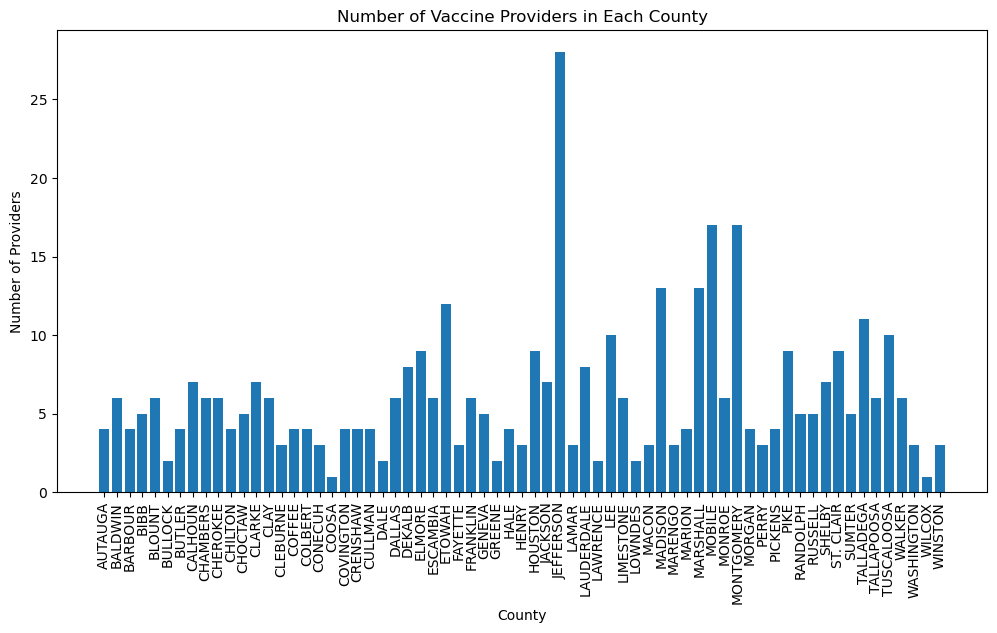

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(providers_count_by_county['County'], providers_count_by_county['Name'])
plt.xlabel('County')
plt.ylabel('Number of Providers')
plt.title('Number of Vaccine Providers in Each County')
plt.xticks(rotation=90)
plt.show()

In [59]:
pip install pandas


In [60]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd


vaccine_data = pd.read_csv('COVID-19 County Vaccine Data.csv') 



In [110]:
vaccine_data['complete_vaccination_rate'] = (vaccine_data['People Completely Vaccinated'] / vaccine_data['Doses Administered']) * 100
sorted_vaccine_data = vaccine_data.sort_values(by='complete_vaccination_rate', ascending=False)
sorted_vaccine_data[['County', 'People Completely Vaccinated', 'complete_vaccination_rate']]


,County,People Completely Vaccinated,complete_vaccination_rate
10,Cherokee,6151,50.834711
33,Hale,5092,49.355433
67,Wilcox,3283,49.227770
29,Fayette,4137,49.191439
38,Lamar,3367,48.867925
...,...,...,...
32,Greene,2425,44.503579
4,Bibb,4959,44.455401
24,Dallas,9748,43.797457
43,Lowndes,3341,43.451684


In [111]:
plt.figure(figsize=(12, 12))
fig = px.bar(sorted_vaccine_data, x='County', y='People Completely Vaccinated',
             title='Complete Vaccination Rate by County in descending Order',
             labels={'complete_vaccination_rate': 'Complete Vaccination Rate (%)'},
             hover_data=['Doses Administered', 'complete_vaccination_rate'])

<Figure size 1200x1200 with 0 Axes>

In [112]:
fig.update_layout(xaxis_title='County', yaxis_title='Complete Vaccination Rate (%)')
fig.show()

In [115]:
descriptive_stats = sorted_vaccine_data[['complete_vaccination_rate','People Completely Vaccinated']].describe()
print(descriptive_stats)


       complete_vaccination_rate  People Completely Vaccinated
count                  69.000000                  6.900000e+01
mean                   46.758519                  4.235719e+04
std                     1.507062                  1.768050e+05
min                    43.301305                  2.425000e+03
25%                    45.852116                  4.934000e+03
50%                    46.773103                  8.627000e+03
75%                    47.708874                  2.352500e+04
max                    50.834711                  1.461323e+06


In [116]:
correlation_matrix = sorted_vaccine_data[['complete_vaccination_rate','People Completely Vaccinated']].corr()
print(correlation_matrix)

                              complete_vaccination_rate  \
complete_vaccination_rate                      1.000000   
People Completely Vaccinated                  -0.021572   

                              People Completely Vaccinated  
complete_vaccination_rate                        -0.021572  
People Completely Vaccinated                      1.000000  


In [117]:
import plotly.express as px

fig = px.histogram(sorted_vaccine_data, x='complete_vaccination_rate', nbins=20,
                   title='Distribution of Complete Vaccination Rate')
fig.show()

In [119]:
state_stats = sorted_vaccine_data.groupby('County')['complete_vaccination_rate'].mean().reset_index()
state_stats

,County,complete_vaccination_rate
0,Alabama,46.608000
1,Autauga,45.477813
2,Baldwin,45.561466
3,Barbour,44.557077
4,Bibb,44.455401
...,...,...
64,Unknown,43.301305
65,Walker,48.679099
66,Washington,46.592204
67,Wilcox,49.227770


In [89]:
fig = px.pie(sorted_vaccine_data, names='County', values='complete_vaccination_rate',
             title='Complete Vaccination Rate by County')

In [90]:
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()